In [106]:
import numpy as np # linear algebra operations
import pandas as pd # used for data preparation
import plotly.express as px #used for data visualization
from textblob import TextBlob #used for sentiment analysis

df = pd.read_csv('netflix_titles.csv')

In [107]:

df.shape

(6234, 12)

In [108]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [109]:

df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [110]:

x = df.groupby(['rating']).size().reset_index(name='counts')
print(x)

      rating  counts
0          G      37
1      NC-17       2
2         NR     218
3         PG     184
4      PG-13     286
5          R     508
6      TV-14    1698
7       TV-G     149
8      TV-MA    2027
9      TV-PG     701
10      TV-Y     143
11     TV-Y7     169
12  TV-Y7-FV      95
13        UR       7


In [111]:

pieChart = px.pie(x, values='counts', names='rating', title='Distribution of content ratings on Netflix')
pieChart.show()

In [112]:

df['director']=df['director'].fillna('Director not specified')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Director not specified,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,Director not specified,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,Director not specified,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [113]:

directors_list = pd.DataFrame()
print(directors_list)

Empty DataFrame
Columns: []
Index: []


In [114]:
directors_list = df['director'].str.split(',', expand=True).stack()
print(directors_list)

0     0              Richard Finn
      1                Tim Maltby
1     0    Director not specified
2     0    Director not specified
3     0    Director not specified
                    ...          
6229  0    Director not specified
6230  0    Director not specified
6231  0    Director not specified
6232  0    Director not specified
6233  0    Director not specified
Length: 6821, dtype: object


In [115]:

directors_list = directors_list.to_frame()
print(directors_list)

                             0
0    0            Richard Finn
     1              Tim Maltby
1    0  Director not specified
2    0  Director not specified
3    0  Director not specified
...                        ...
6229 0  Director not specified
6230 0  Director not specified
6231 0  Director not specified
6232 0  Director not specified
6233 0  Director not specified

[6821 rows x 1 columns]


In [116]:
directors_list.columns = ['director']
print(directors_list)

                      director
0    0            Richard Finn
     1              Tim Maltby
1    0  Director not specified
2    0  Director not specified
3    0  Director not specified
...                        ...
6229 0  Director not specified
6230 0  Director not specified
6231 0  Director not specified
6232 0  Director not specified
6233 0  Director not specified

[6821 rows x 1 columns]


In [117]:

directors = directors_list.groupby(['director']).size().reset_index(name='Total Count')
print(directors)

                       director  Total Count
0                Aaron Moorhead            1
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
3732                Çagan Irmak            1
3733           Ísold Uggadóttir            1
3734        Óskar Thór Axelsson            1
3735           Ömer Faruk Sorak            2
3736               Şenol Sönmez            2

[3737 rows x 2 columns]


In [118]:
directors = directors[directors.director != 'Director not specified']
print(directors)

                       director  Total Count
0                Aaron Moorhead            1
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
3732                Çagan Irmak            1
3733           Ísold Uggadóttir            1
3734        Óskar Thór Axelsson            1
3735           Ömer Faruk Sorak            2
3736               Şenol Sönmez            2

[3736 rows x 2 columns]


In [119]:
directors = directors.sort_values(by=['Total Count'], ascending = False)
print(directors)

              director  Total Count
196          Jan Suter           18
2968       Raúl Campos           18
1780         Jay Karas           14
2367      Marcus Raboy           14
1778       Jay Chapman           12
...                ...          ...
19     Alexander Smith            1
20      Alexis Morante            1
21       Alfred Gimeno            1
22      Alicky Sussman            1
2802    Paul Shoulberg            1

[3736 rows x 2 columns]


In [120]:
top5Directors = directors.head()
print(top5Directors)

          director  Total Count
196      Jan Suter           18
2968   Raúl Campos           18
1780     Jay Karas           14
2367  Marcus Raboy           14
1778   Jay Chapman           12


In [121]:
top5Directors = top5Directors.sort_values(by=['Total Count'])
barChart = px.bar(top5Directors, x='Total Count', y = 'director', title = 'Top 5 Directors on Netflix')
barChart.show()

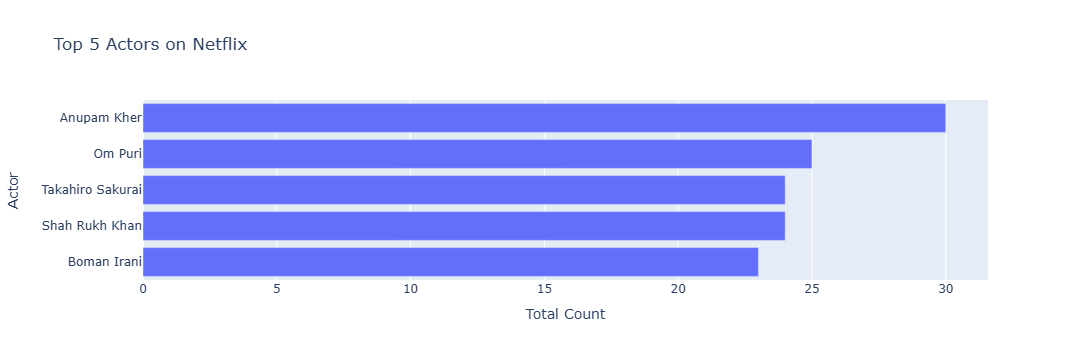

In [122]:
df['cast']=df['cast'].fillna('No cast specified')
cast_df = pd.DataFrame()
cast_df = df['cast'].str.split(',',expand=True).stack()
cast_df = cast_df.to_frame()
cast_df.columns = ['Actor']
actors = cast_df.groupby(['Actor']).size().reset_index(name = 'Total Count')
actors = actors[actors.Actor != 'No cast specified']
actors = actors.sort_values(by=['Total Count'], ascending=False)
top5Actors = actors.head()
top5Actors = top5Actors.sort_values(by=['Total Count'])
barChart2 = px.bar(top5Actors, x='Total Count', y='Actor', title='Top 5 Actors on Netflix')
barChart2.show()

In [123]:

df1 = df[['type', 'release_year']]
df1 = df1.rename(columns = {"release_year":"Release Year", "type": "Type"})
df2 = df1.groupby(['Release Year', 'Type']).size().reset_index(name='Total Count')
print(df2)

     Release Year     Type  Total Count
0            1925  TV Show            1
1            1942    Movie            2
2            1943    Movie            3
3            1944    Movie            3
4            1945    Movie            3
..            ...      ...          ...
110          2018  TV Show          417
111          2019    Movie          400
112          2019  TV Show          443
113          2020    Movie            6
114          2020  TV Show           19

[115 rows x 3 columns]


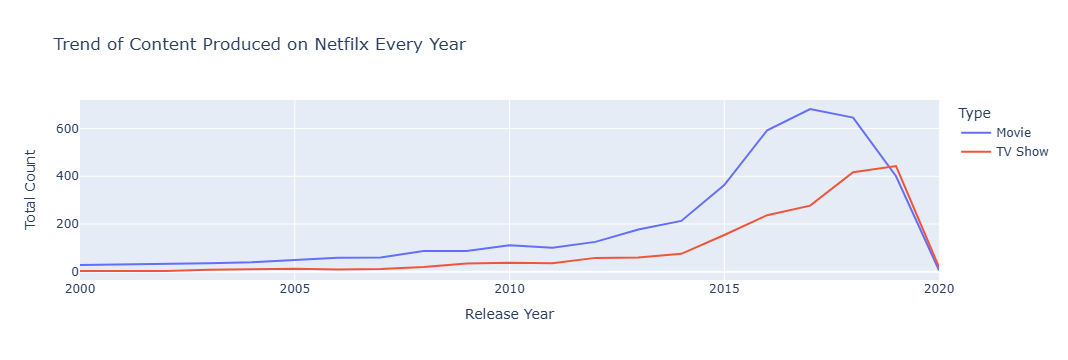

In [124]:
df2 = df2[df2['Release Year']>=2000]
graph = px.line(df2, x = "Release Year", y="Total Count", color = "Type", title = "Trend of Content Produced on Netfilx Every Year")
graph.show()
     

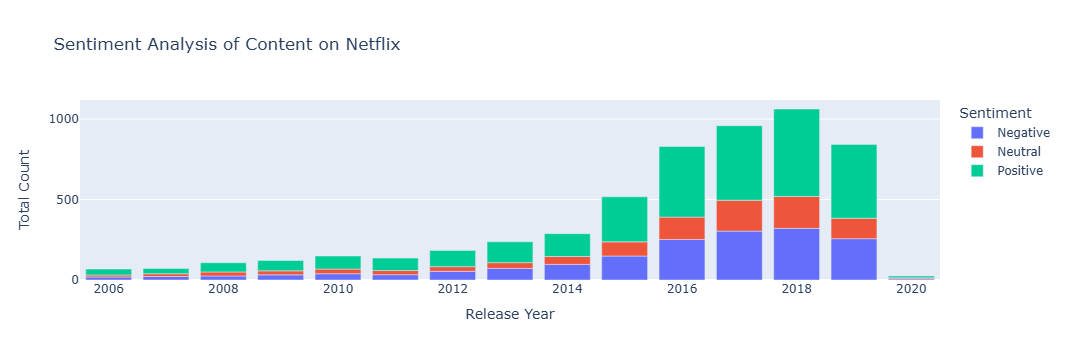

In [125]:
df3 = df[['release_year', 'description']]
df3 = df3.rename(columns = {'release_year':'Release Year', 'description':'Description'})
for index, row in df3.iterrows():
  d=row['Description']
  testimonial = TextBlob(d)
  p = testimonial.sentiment.polarity
  if p==0:
    sent = 'Neutral'
  elif p>0:
    sent = 'Positive'
  else:
    sent = 'Negative'
  df3.loc[[index, 2], 'Sentiment']=sent

df3 = df3.groupby(['Release Year', 'Sentiment']).size().reset_index(name = 'Total Count')

df3 = df3[df3['Release Year']>2005]
barGraph = px.bar(df3, x="Release Year", y="Total Count", color = "Sentiment", title = "Sentiment Analysis of Content on Netflix")
barGraph.show()
     

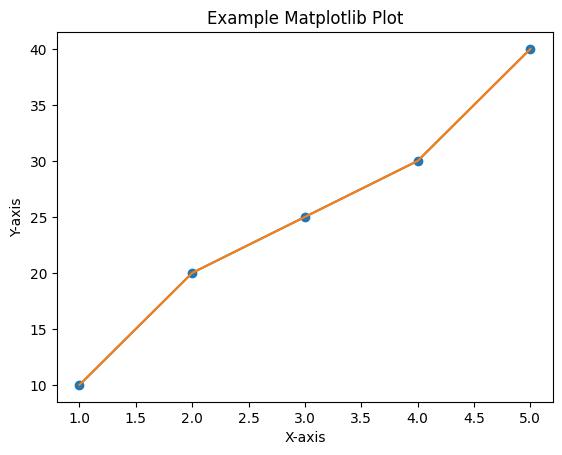

In [126]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [10, 20, 25, 30, 40]

plt.plot(x, y, marker='o')
plt.plot(x, y)
plt.title("Example Matplotlib Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()



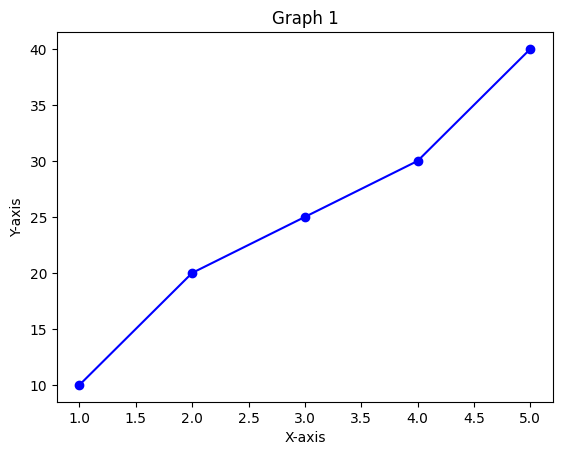

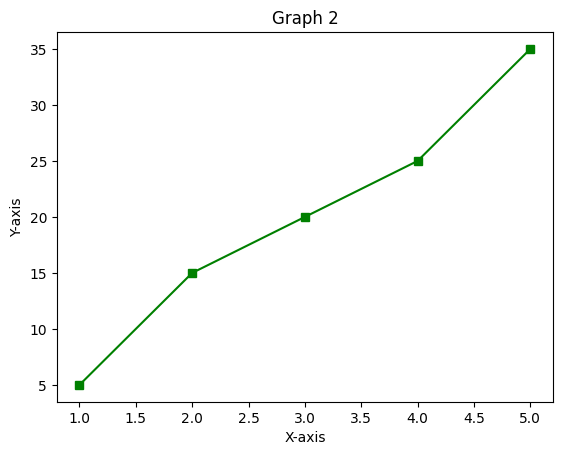

In [127]:
import matplotlib.pyplot as plt

# Data for first graph
x1 = [1, 2, 3, 4, 5]
y1 = [10, 20, 25, 30, 40]

# Data for second graph
x2 = [1, 2, 3, 4, 5]
y2 = [5, 15, 20, 25, 35]

# First figure
plt.figure(1)
plt.plot(x1, y1, marker='o', color='blue')
plt.title("Graph 1")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Second figure
plt.figure(2)
plt.plot(x2, y2, marker='s', color='green')
plt.title("Graph 2")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Show both figures
plt.show()
